<h1 align = "center">Intuitive Understanding of Randomized Singular Value Decomposition</h1>

<h4 align = "center">A Python Implementation of SVD with Randomized Linear Algebra</h4>

Matrix decomposition is a foundational tool for some critical applications like data compression, dimensionality reduction, and sparsity learning. In many cases, for purposes of approximating a data matrix by a low-rank structure, the Singular Value Decomposition (SVD) is often verified as the best choice. However, the accurate and efficient SVD of large-scale datasets is computationally challenging. To resolve the SVD in this situation, there are many algorithms have been developed by applying randomized linear algebra. One of the most important algorithms is randomized SVD, which is competitively efficient for factorizing any matrix with a relatively low rank.

<p align="center">
<img align="middle" src="../images/svd_history.png" width="750" />
</p>

<center><b>Figure 1</b>: A timeline of major SVD developments. (The picture is from [2]).</center>


This post will introduce the preliminary and essential idea of the randomized SVD. To help readers gain a better understanding of randomized SVD, we also provide the corresponding Python implementation in this post.

> For reproducing this notebook, please clone or download the **tensor-learning** repository ([https://github.com/xinychen/tensor-learning](https://github.com/xinychen/tensor-learning)) on your computer first.

## Preliminary

### SVD Formula

As you may already know, SVD is one of the most important decomposition formula in linear algebra. For any given matrix $\boldsymbol{A}$, SVD has the form of
\begin{equation}
\boldsymbol{A}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^\top
\end{equation}
where the matrices $\boldsymbol{U}$ and $\boldsymbol{V}$ consist of left and right singular vectors, respectively. The diagonal entries of $\boldsymbol{\Sigma}$ are singular values.

### A Small Matrix Example

We will give a sufficiently detailed understanding with a small worked example. The problem is a simple SVD of 3-by-3 matrix, i.e.,
$$\boldsymbol{A}=\left(\begin{array}{cccc}
1 & 3 & 2 \\
5 & 3 & 1 \\
3 & 4 & 5 \\
\end{array}\right)\in\mathbb{R}^{3\times 3}.$$

Take this 3-by-3 matrix for example, we can compute the SVD by using `numpy.linalg.svd()` in Python. Let us take a look:

In [1]:
import numpy as np

A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
u, s, v = np.linalg.svd(A, full_matrices = 0)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)
print()

Left singular vectors:
[[-0.37421754  0.28475648 -0.88253894]
 [-0.56470638 -0.82485997 -0.02669705]
 [-0.7355732   0.48838486  0.46948087]]

Singular values:
[9.34265841 3.24497827 1.08850813]

Right singular vectors:
[[-0.57847229 -0.61642675 -0.53421706]
 [-0.73171177  0.10269066  0.67383419]
 [ 0.36051032 -0.78068732  0.51045041]]



In this case, the singular values are **9.3427**, **3.2450**, and **1.0885**.

## Randomized SVD

### Essential Idea

Randomized SVD can be broken into three steps. For any given $m$-by-$n$ matrix $\boldsymbol{A}$, if we impose a target rank $k$ with $k < \min\{m, n\}$, then the first step is to

- 1) generate a Gaussian random matrix $\boldsymbol{Ω}$ with size of $n$-by-$k$,
- 2) compute a new $m$-by-$k$ matrix $\boldsymbol{Y}$,
- and 3) apply QR decomposition to the matrix $\boldsymbol{Y}$.

Note that the first step needs to return the $m$-by-$k$ matrix $\boldsymbol{Q}$.

<p align="center">
<img align="middle" src="../images/rsvd_step1.png" width="600" />
</p>

<center><b>Figure 2</b>: The first step of randomized SVD. (The picture is from [2]).</center>

Then, the second step as shown in Figure 3 is to

- 4) derive a $k$-by-$n$ matrix $\boldsymbol{B}$ by multiplying $\boldsymbol{Q}^\top$ and the matrix $\boldsymbol{A}$ together, i.e., $\boldsymbol{B}=\boldsymbol{Q}^\top\boldsymbol{A}$,
- and 5) compute the SVD of the matrix $\boldsymbol{B}$. Here, instead of computing the SVD of the original matrix $\boldsymbol{A}$, $\boldsymbol{B}$ is a smaller matrix to work with.

Note that the singular values (i.e., $\boldsymbol{\Sigma}$)and right singular vectors (i.e., $\boldsymbol{V}$) of the matrix $\boldsymbol{B}$ are also the singular values and right singular vectors of the matrix $\boldsymbol{A}$.

<p align="center">
<img align="middle" src="../images/rsvd_step2.png" width="640" />
</p>

<center><b>Figure 3</b>: The second and third steps of randomized SVD. (The picture is from [2]).</center>

As shown in Figure 3, if we combine the matrix $\boldsymbol{Q}$ derived in the first step with the left singular vectors of $\boldsymbol{B}$, we can get the left singular vectors (i.e., $\boldsymbol{U}$) of the matrix $\boldsymbol{A}$ in the third step.

### A Small Matrix Example

Even though we have learned the essential idea of randomized SVD in above, it would not be really clear if there is no intuitive example. To this end, we follow the aforementioned small matrix SVD.

First, let us try to write a Python function for randomized SVD. Here, we will use two Numpy functions, i.e., `np.linalg.qr()` and `np.linalg.svd()`.

In [2]:
import numpy as np

def rsvd(A, Omega):
    Y = A @ Omega
    Q, _ = np.linalg.qr(Y)
    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde
    return u, s, v

Now, let us test it with 3-by-3 matrix (`rank = 2` for indicating $k$ with $k < \min(m, n)$):

In [3]:
np.random.seed(1000)
A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
rank = 2
Omega = np.random.randn(A.shape[1], rank)
u, s, v = rsvd(A, Omega)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)
print()

Left singular vectors:
[[ 0.38070859  0.60505354]
 [ 0.56830191 -0.74963644]
 [ 0.72944767  0.26824507]]

Singular values:
[9.34224023 3.02039888]

Right singular vectors:
[[ 0.57915029  0.61707064  0.53273704]
 [-0.77420021  0.21163814  0.59650929]]



Recall that the singular values of this matrix are **9.3427**, **3.2450**, and 1.0885. In this case, randomized SVD has the first two singular values as **9.3422** and **3.0204**.

We can see that the first singular values computed by these two SVD algorithms are extremely close. However, the second singular value of randomized SVD has a slight bias. Is there any other method to improve this result? And how?

The answer is yes!

## Randomized SVD with Power Iteration

To improve the quality of randomized SVD, power iteration method can be used directly. For more detail about power iteration, please see the page 39 in [1] and there is also a Matlab implementation in the page 40.

In the following Python codes, `power_iteration()` is the function for computing the $m$-by-$k$ matrix $\boldsymbol{Y}$ iteratively (the default `power_iter` is 3) and then derive the $m$-by-$k$ matrix $\boldsymbol{Q}$ by QR decomposition.

In [4]:
import numpy as np

def power_iteration(A, Omega, power_iter = 3):
    Y = A @ Omega
    for q in range(power_iter):
        Y = A @ (A.T @ Y)
    Q, _ = np.linalg.qr(Y)
    return Q

def rsvd(A, Omega):
    Q = power_iteration(A, Omega)
    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde
    return u, s, v

Let us test our new `rsvd()` function:

In [5]:
np.random.seed(1000)

A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
rank = 2
Omega = np.random.randn(A.shape[1], rank)
u, s, v = rsvd(A, Omega)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)
print()

Left singular vectors:
[[ 0.37421757  0.28528579]
 [ 0.56470638 -0.82484381]
 [ 0.73557319  0.48810317]]

Singular values:
[9.34265841 3.24497775]

Right singular vectors:
[[ 0.57847229  0.61642675  0.53421706]
 [-0.73178429  0.10284774  0.67373147]]



Recall that:

- Singular values of SVD are: **9.3427**, **3.2450**, and 1.0885.
- Singular values of randomized SVD without power iteration are: **9.3422** and **3.0204**.
- Singular values of randomized SVD with power iteration are: **9.3427** and **3.2450**.

As you can see, the randomized SVD with power iteration provides extremely accurate singular values.

## Image Compression



For our evaluation, we choose the color image of **Lena** as our data. The size of this image is $256\times 256\times 3$. Here, we build a matrix $\boldsymbol{A}$ of size $256\times 256$ by only selecting the green chanel.

- **Using SVD directly**

In [6]:
import numpy as np
import imageio

image = imageio.imread('../datasets/color-images/lena.bmp')
A = image[:, :, 1]
%time u, s, v = np.linalg.svd(A, full_matrices = 0)

CPU times: user 28.3 ms, sys: 3.24 ms, total: 31.5 ms
Wall time: 16.3 ms


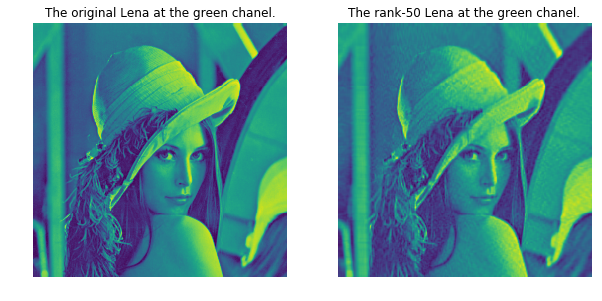

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('The original Lena at the green chanel.')
plt.axis('off')

plt.subplot(1, 2, 2)
rank = 50
plt.imshow(u[:, : rank] @ np.diag(s[: rank]) @ v[: rank, :])
plt.title('The rank-50 Lena at the green chanel.')
plt.axis('off')
plt.show()

- **Using randomized SVD instead**

CPU times: user 10.5 ms, sys: 1.05 ms, total: 11.6 ms
Wall time: 6.17 ms


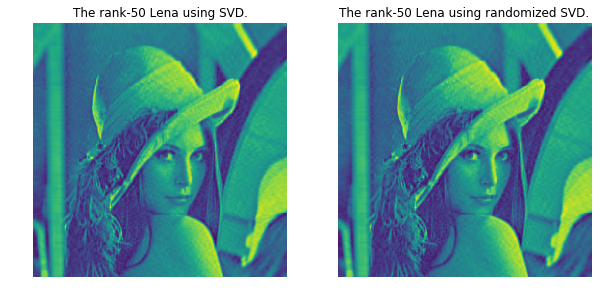

In [8]:
plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(u[:, : rank] @ np.diag(s[: rank]) @ v[: rank, :])
plt.title('The rank-50 Lena using SVD.')
plt.axis('off')

rank = 50
Omega = np.random.randn(A.shape[1], rank)
%time u, s, v = rsvd(A, Omega)

plt.subplot(1, 2, 2)
plt.imshow(u[:, : rank] @ np.diag(s[: rank]) @ v[: rank, :])
plt.title('The rank-50 Lena using randomized SVD.')
plt.axis('off')
plt.show()

We can see from this image compression experiment that:

- 1) By comparing to the SVD, the randomized SVD can also produce accurate compression with a prescribed low rank (here, we set `rank = 50`).

- 2) The randomized SVD is computational friendly. By specifying `rank = 50`, the total CPU times of the randomized SVD is **11.6 ms**, while the total CPU times of the SVD is **31.5 ms**.

### Summary

In this post, you discovered the randomized linear algebra method for SVD. Specifically, you learned:

- The essential idea of randomized SVD.
- How to implement randomized SVD in Python.

Do you have any question? Ask your question by creating an issue at the **tensor-learning** repository ([https://github.com/xinychen/tensor-learning](https://github.com/xinychen/tensor-learning)) and I will do my best to answer. If you find these codes useful, please star (★) this repository.

### References

[1] Steven L. Brunton, J. Nathan Kutz (2019). Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control. Page 37–41.

[2] N. Benjamin Erichson, Sergey Voronin, Steven L. Brunton, J. Nathan Kutz (2016). Randomized Matrix Decompositions Using R. arXiv:1608.02148. [[PDF](https://arxiv.org/pdf/1608.02148.pdf)]

### License

<div class="alert alert-block alert-danger">
<b>This work is released under the MIT license.</b>
</div>